# Dataset Titanic 

## Load Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model 
import seaborn as sns
from google.colab import files
import io 

## Import Data

In [33]:
datos = files.upload()

Saving train.csv to train (3).csv


In [34]:
df = pd.read_csv(io.BytesIO(datos['train.csv']))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Conociendo los datos

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
df.apply(lambda x: len(x.unique()))

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

In [38]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [39]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Cleaning

In [40]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [41]:
values_sex = {'Sex':{'male':1, 'female':2}}
df.replace(values_sex, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [43]:
values_embarked = {'Embarked':{'S':1, 'C':2, 'Q':3}}
df.replace(values_embarked, inplace=True)

In [44]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2.0
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0


## Hallar media de Edad

In [45]:
df['Age'].mean()

29.69911764705882

In [46]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,446.000000,0.383838,2.308642,1.352413,29.699118,0.523008,0.381594,32.204208,1.362205
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,1.000000,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,1.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,2.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,2.000000,80.000000,8.000000,6.000000,512.329200,3.000000


## Reemplazar nan con media de Edad

In [48]:
df['Age'] = df['Age'].replace(np.nan, 30)

## Eliminar columna Cabina ya que tiene nulos y no es necesaria

In [49]:
df=df.drop(columns='Cabin')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,2.0
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,1.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,1.0


## Eliminar datos innecesarios

In [50]:
df = df.drop(['PassengerId','Name', 'Ticket'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1.0
1,1,1,2,38.0,1,0,71.2833,2.0
2,1,3,2,26.0,0,0,7.9250,1.0
3,1,1,2,35.0,1,0,53.1000,1.0
4,0,3,1,35.0,0,0,8.0500,1.0


In [51]:
df = df.dropna(how='any')

In [52]:
print(df.shape)

(889, 8)


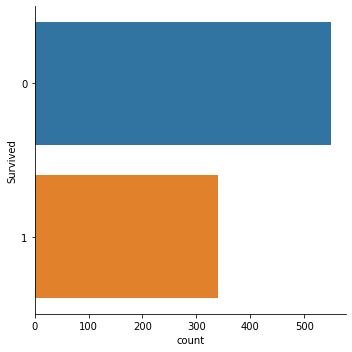

In [53]:
import seaborn as sns
g = sns.catplot(y = 'Survived', data=df, kind='count')

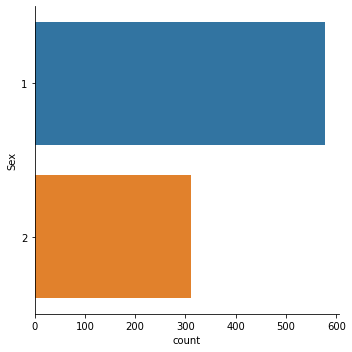

In [54]:
g = sns.catplot(y='Sex', data=df, kind='count')

## Preparar datos

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [58]:
x = df.drop(columns='Survived')
y = df['Survived']

### Train y Test

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Aplicar modelo de regresión logística

## Instanciación de modelo

In [60]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('Precisión por Regresión Logística: ', model.score(x_train, y_train))

Precisión por Regresión Logística:  0.8255977496483825


## Graficas



[[92 13]
 [52 21]]


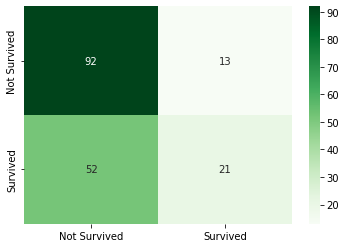

In [80]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n {v2} \n {v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['Not Survived', 'Survived']
dataframe = pd.DataFrame(cm, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='Greens')

## Arboles de Decisión

In [66]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)
print('Precisión por Árboles de Decisión: ', model2.score(x_train,y_train))

Precisión por Árboles de Decisión:  0.9817158931082982


In [67]:
from sklearn.metrics import confusion_matrix

Matriz de Confusión
[[89 16]
 [25 48]]


## Matriz de Confusión 



Matriz de Confusión
[[92 13]
 [52 21]]


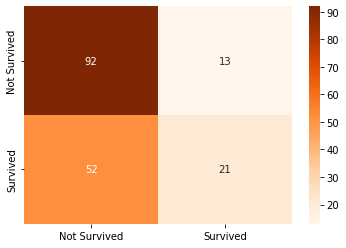

In [82]:
import seaborn as sns
matriz2 = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión')
print(matriz2)
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in matriz2.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matriz2.flatten()/np.sum(matriz2)]
labels = [f"{v1}\n {v2} \n {v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['Not Survived', 'Survived']
dataframe = pd.DataFrame(matriz2, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='Oranges')

## Support Vector Machines

In [75]:
from sklearn.svm import SVC
model3 = SVC()
model3.fit(x_train,y_train)
y_pred = model3.predict(x_test)
print('Precisión por Support Vector Machines: ', model3.score(x_train, y_train))

Precisión por Support Vector Machines:  0.6849507735583685


Matriz de Confusión
[[92 13]
 [52 21]]


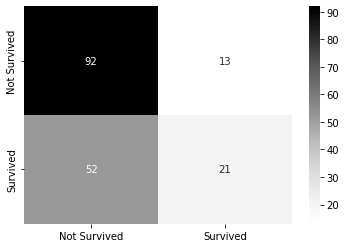

In [85]:
matriz3 = confusion_matrix(y_test,y_pred)
print('Matriz de Confusión')
print(matriz3)
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in matriz3.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matriz3.flatten()/np.sum(matriz3)]
labels = [f"{v1}\n {v2} \n {v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['Not Survived', 'Survived']
dataframe = pd.DataFrame(matriz3, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='Greys')

## Vecinos más cercano  KNN


In [91]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors = 1)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)
print('Precisión del vecino más cercano: ', model4.score(x_train, y_train))

Precisión del vecino más cercano:  0.980309423347398


Matriz de Confusión
[[80 25]
 [31 42]]


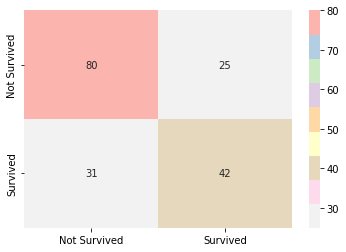

In [92]:
matriz4 = confusion_matrix(y_test,y_pred)
print('Matriz de Confusión')
print(matriz4)
group_names = ['True Neg','False Pos','False Neg', 'True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in matriz4.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in matriz4.flatten()/np.sum(matriz4)]
labels = [f"{v1}\n {v2} \n {v3}" for v1, v2, v3 in zip (group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
class_names = ['Not Survived', 'Survived']
dataframe = pd.DataFrame(matriz4, index=class_names, columns=class_names)
sns.heatmap(dataframe, annot=True, fmt='', cmap='Pastel1_r')